<a href="https://colab.research.google.com/github/noreallyimfine/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import matplotlib.pyplot as plt
import numpy as np


(Text(0.5, 1.0, 'Fails Vertical Line Test'),)

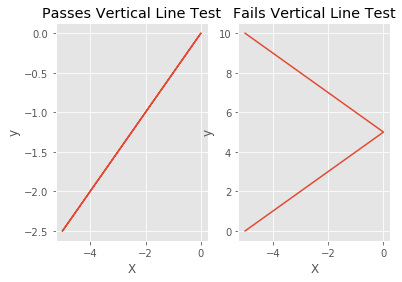

In [24]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1,2)

X = np.array([-5,-4,-3,-2,-1,0,-1,-2,-3,-4,-5])
y1 = X/2
y2 = [0,1,2,3,4,5,6,7,8,9,10]

ax1, ax2 = ax

ax1.plot(X, y1)
ax2.plot(X, y2)

ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Passes Vertical Line Test')

ax2.set_xlabel('X')
ax2.set_ylabel('y')
ax2.set_title('Fails Vertical Line Test'),

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because they produce multiple outputs for one input

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Only relation 2 is a funtion bec all the others have one input (X-value) mapping to multiple outputs (y-values)

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

Input {m:3, n:4} <br>
<br>
Output {m:3, n:2}

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes. For example \begin{align} m(x_1) = (2x_1, x_1 + 5) \end{align}

```
# This is formatted as code
```



# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align} 
T_p = \begin{bmatrix}
1 \\ 0 \end{bmatrix} 
= \begin{bmatrix}
1 + 3(0) \\ 2(0) - 1 
\end{bmatrix}
\begin{bmatrix}
0 + 3(1) \\ 2(1) - 0
\end{bmatrix} 
= \begin{bmatrix}
1 \ 3 \\ -1 \ 2
\end{bmatrix}
\end{align}


\begin{align}
T_q = 
\begin{bmatrix}
4 & 1 & 2 \\
-1 & 2 & 3 \\
5 & 1 & -2
\end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

output vector for (1,2) using traditional functions
\begin{align}
T_p
\begin{bmatrix}
1 \\ 2
\end{bmatrix}
 = \begin{bmatrix}
7 \\ 3
\end{bmatrix}
\end{align}

output vector for (1,2,3) using tradition functions
\begin{align}
T_q
\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
= \begin{bmatrix}
12 \\ 12 \\ 1
\end{bmatrix}
\end{align}

In [26]:
# Using vector-matrix multiplication

v = [1, 2]
T_p = [[1, 3], [-1, 2]]
w = [1,2,3]
T_q = [[4, 1, 2], [-1, 2, 3], [5, 1, -2]]
print('Tp of vector (1,2) =', np.matmul(T_p, v))
print('T_q of vector (1,2,3) = ', np.matmul(T_q, w))

Tp of vector (1,2) = [7 3]
T_q of vector (1,2,3) =  [12 12  1]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are the vectors who's orientation doesnt change in the linear transformation. Eigenvalues are how much that vector is scaled(stretched/squished)

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

1. Difficult to visualize
2. Pairplots will break environment or be too numerous to view
3. Diminishing returns of new parameters
4. Increased workload (which combines with 3 nicely)
5. Overfitting

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

5x observations as parameters, or N = 5P

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
import pandas as pd
from sklearn.decomposition import PCA

In [28]:
# Load data
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')

# Print shape and first 5 rows
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [60]:
# Split X and y
X = df.iloc[:, :-1]
y = df['species']

X.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [61]:
# Subtract all values by the column mean
zeroed = X - X.mean()

# Check that all means are now 0
zeroed.mean()

sepal_length   -1.125026e-15
sepal_width    -6.750156e-16
petal_length   -3.238891e-15
petal_width    -6.069219e-16
dtype: float64

In [46]:
# Divdide by standard deviation
centered = zeroed / zeroed.std()

# See what it looks like
centered.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


In [65]:
centered.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [62]:
# Pull our eigenvalues and eigenvectors, splitting them into separate variables
cov = centered.cov()
values, vectors = np.linalg.eig(cov)

# Check out our values
values, vectors

(array([2.91081808, 0.92122093, 0.14735328, 0.02060771]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

In [56]:
two_vals = values[:2]
two_vecs = vectors[:2]

two_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481]])

In [0]:
P = vectors.T.dot(centered.T)

P

In [0]:
pca = PCA(2)

pca.fit(X)

B = pca.transform(X)
B

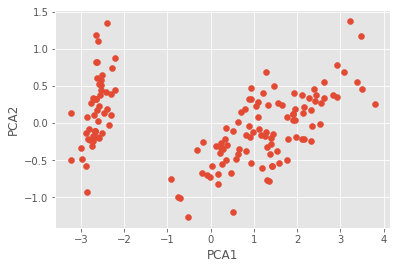

In [73]:
plt.scatter(B[:, 0], B[:, 1])
plt.xlabel('PCA1')
plt.ylabel('PCA2');

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)